# Bing News numbers

In [2]:
import pandas as pd
import json
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df_de = pd.read_csv("events/events_dataframe_de.csv", converters={'redirects': pd.eval, 'list_views_7_days':pd.eval})
df_de = df_de[(df_de["views_7_sum"] != 0) & (df_de.cat != "")]

In [4]:
len(df_de["pagetitle"].unique())

1014

In [8]:
with open('scraping/results/de_bingnews.json') as json_data:
    data_old = json.load(json_data)
len(data_old.keys())

1011

In [7]:
with open('scraping/results/de_bingnews_new.json') as json_data:
    data = json.load(json_data)
len(data.keys())

1014

In [24]:
def get_hits_from_json(json_data, serp='bing_news'):
    bing_news_hits = []
    i = 0 
    for title, crawl_res in json_data.items():
        # get result string and clean
        res_string = crawl_res['1']['num_results']
        num_string = re.sub('[^0-9]', '', res_string)
        bing_news_hits.append([title, int(num_string)])
        
        # debug output
        if i%100 == 0:
            print(title, res_string, num_string)
        i+=1
    return pd.DataFrame(bing_news_hits, columns=['pagetitle', f'{serp}_hits'])

In [22]:
de_news_hits_old = get_hits_from_json(data_old, serp='bing_news_old')
de_news_hits_old.head()

Griechisches Referendum 2015 48 Ergebnisse 48
Unser Lied für Stockholm 7 680 Ergebnisse 7680
Kommunalwahlen in Niedersachsen 2016 58 Ergebnisse 58
La Drôme Classic 2017 27 500 Ergebnisse 27500
Parlamentswahl in Albanien 2017 15 Ergebnisse 15
US Poker Open 2018 3 480 000 Ergebnisse 3480000
Großer Preis von Belgien 2018 36 700 Ergebnisse 36700
Sanya E-Prix 2019 142 Ergebnisse 142
Türkische Militäroffensive auf Afrin 18 Ergebnisse 18
Anschlag in Hanau 2020 5 770 Ergebnisse 5770
Amokfahrt in Trier 6 610 Ergebnisse 6610


,pagetitle,bing_news_old_hits
0,Griechisches Referendum 2015,48
1,Großer Preis von Großbritannien 2015,27400
2,Amoklauf von Leutershausen,5
3,Anschlag in Suruç 2015,11300
4,Amoklauf in Lafayette,42


In [23]:
de_news_hits = get_hits_from_json(data)
de_news_hits.head()

Griechisches Referendum 2015 48 Ergebnisse 48
Parlamentswahl im Iran 2016 72 Ergebnisse 72
Parlamentswahl in Kroatien 2016 27 Ergebnisse 27
Oscarverleihung 2017 19.300 Ergebnisse 19300
Anschlagsversuch am 20. Juni 2017 in Brüssel 22.200 Ergebnisse 22200
Super Bowl LII 5.990 Ergebnisse 5990
6-Stunden-Rennen von Silverstone 2018 10.800 Ergebnisse 10800
Biathlon-Weltmeisterschaften 2019 8.860 Ergebnisse 8860
Anschlag in El Paso 32 Ergebnisse 32
Pabandom iš naujo! 2020 33 Ergebnisse 33
Deutsche Meisterschaften im Rennrodeln 2020 40.500 Ergebnisse 40500


,pagetitle,bing_news_hits
0,Griechisches Referendum 2015,48
1,Großer Preis von Großbritannien 2015,27300
2,Amoklauf von Leutershausen,5
3,Anschlag in Suruç 2015,11300
4,Amoklauf in Lafayette,42


In [16]:
de_merged = de_news_hits.merge(de_news_hits_old, on='pagetitle', copy=False)

In [43]:
# remove recurring events
df_de = df_de[~df_de.pagetitle.duplicated(keep=False)]
df_de = df_de.merge(de_news_hits, on='pagetitle', copy=False, how='left')

In [44]:
not_found = df_de[pd.isna(df_de.bing_news_hits)].copy()
not_found

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,...,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean,bing_news_hits


In [45]:
df_de = df_de[~pd.isna(df_de.bing_news_hits)]
df_de

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,...,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean,bing_news_hits
0,Griechisches Referendum 2015,2015-07-05,Global North,Europe,politics,"['Kategorie:Eurokrise', 'Kategorie:Griechische...",37404,3421.000000,13684,4032,...,3590.5,-999,"[10231, 16293, 4343, 2445, 1738, 1310, 912]",-9,2015,planed,not_surprising,before,5324.571429,48
1,Großer Preis von Großbritannien 2015,2015-07-05,Global North,Europe,sports,"['Kategorie:Großer Preis von Großbritannien', ...",1155,126.500000,253,158,...,126.5,63,"[474, 365, 116, 68, 49, 42, 41]",-123,2015,planed,not_surprising,before,165.000000,27300
2,Amoklauf von Leutershausen,2015-07-10,Global North,Europe,disaster,"['Kategorie:Amoklauf in Deutschland', 'Kategor...",12222,0.000000,0,0,...,0.0,0,"[726, 3769, 7014, 285, 150, 98, 72]",0,2015,not_planed,not_surprising,NaN,1730.571429,5
3,Anschlag in Suruç 2015,2015-07-20,Global North,Asia,disaster,['Kategorie:Islamistischer Anschlag in der Tür...,17734,0.000000,0,0,...,0.0,0,"[442, 2826, 6157, 3239, 2438, 2000, 592]",0,2015,not_planed,not_surprising,NaN,2527.714286,11300
4,Amoklauf in Lafayette,2015-07-23,Global North,North America,disaster,['Kategorie:Amoklauf in den Vereinigten Staate...,507,0.000000,0,0,...,0.0,0,[],1,2015,not_planed,surprising,surprising,0.000000,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,Handball-Europameisterschaft der Frauen 2020,2020-12-20,Global North,Europe,sports,['Kategorie:Handball-Europameisterschaft der F...,19163,320.000000,2240,548,...,321.0,387,"[2015, 4036, 1924, 2032, 3308, 3611, 2237]",-885,2020,planed,not_surprising,before,2737.571429,300000
1009,Bombenanschlag in Nashville 2020,2020-12-25,Global North,North America,disaster,"['Kategorie:Geschichte (Nashville)', 'Kategori...",505,0.000000,0,0,...,0.0,0,"[316, 189]",5,2020,not_planed,not_surprising,after,252.500000,20
1010,Parlamentswahl in Niger 2020,2020-12-27,Global South,Africa,politics,"['Kategorie:Parlamentswahl 2020', 'Kategorie:W...",290,0.000000,0,0,...,0.0,0,"[20, 32, 10, 27, 13, 19, 19]",0,2020,not_planed,not_surprising,NaN,20.000000,36
1011,World Team Challenge 2020,2020-12-28,Global North,Europe,sports,"['Kategorie:Biathlonveranstaltung 2020', 'Kate...",727,59.666667,179,70,...,55.0,15,"[381, 229, 42, 23, 15, 23, 14]",-3,2020,planed,not_surprising,before,103.857143,1970000


In [46]:
df_de[['views_7_sum', 'year', 'bing_news_hits']].corr('spearman')

,views_7_sum,year,bing_news_hits
views_7_sum,1.000000,0.030866,0.000430
year,0.030866,1.000000,0.046779
bing_news_hits,0.000430,0.046779,1.000000


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
# does this correlate with general google trends?

In [14]:
df_de[df_de.views_7_days_mean > 0]

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,...,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean,bing_news_hits
0,Griechisches Referendum 2015,2015-07-05,Global North,Europe,politics,"['Kategorie:Eurokrise', 'Kategorie:Griechische...",37404,3421.000000,13684,4032,...,3590.5,-999,"[10231, 16293, 4343, 2445, 1738, 1310, 912]",-9,2015,planed,not_surprising,before,5324.571429,48.0
1,Großer Preis von Großbritannien 2015,2015-07-05,Global North,Europe,sports,"['Kategorie:Großer Preis von Großbritannien', ...",1155,126.500000,253,158,...,126.5,63,"[474, 365, 116, 68, 49, 42, 41]",-123,2015,planed,not_surprising,before,165.000000,27400.0
2,Amoklauf von Leutershausen,2015-07-10,Global North,Europe,disaster,"['Kategorie:Amoklauf in Deutschland', 'Kategor...",12222,0.000000,0,0,...,0.0,0,"[726, 3769, 7014, 285, 150, 98, 72]",0,2015,not_planed,not_surprising,NaN,1730.571429,5.0
3,Anschlag in Suruç 2015,2015-07-20,Global North,Asia,disaster,['Kategorie:Islamistischer Anschlag in der Tür...,17734,0.000000,0,0,...,0.0,0,"[442, 2826, 6157, 3239, 2438, 2000, 592]",0,2015,not_planed,not_surprising,NaN,2527.714286,11300.0
5,Großer Preis von Ungarn 2015,2015-07-26,Global North,Europe,sports,"['Kategorie:Großer Preis von Ungarn', 'Kategor...",2040,142.000000,284,207,...,142.0,130,"[973, 594, 162, 126, 86, 53, 46]",-144,2015,planed,not_surprising,before,291.428571,19400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,Handball-Europameisterschaft der Frauen 2020,2020-12-20,Global North,Europe,sports,['Kategorie:Handball-Europameisterschaft der F...,19163,320.000000,2240,548,...,321.0,387,"[2015, 4036, 1924, 2032, 3308, 3611, 2237]",-885,2020,planed,not_surprising,before,2737.571429,301000.0
1009,Bombenanschlag in Nashville 2020,2020-12-25,Global North,North America,disaster,"['Kategorie:Geschichte (Nashville)', 'Kategori...",505,0.000000,0,0,...,0.0,0,"[316, 189]",5,2020,not_planed,not_surprising,after,252.500000,20.0
1010,Parlamentswahl in Niger 2020,2020-12-27,Global South,Africa,politics,"['Kategorie:Parlamentswahl 2020', 'Kategorie:W...",290,0.000000,0,0,...,0.0,0,"[20, 32, 10, 27, 13, 19, 19]",0,2020,not_planed,not_surprising,NaN,20.000000,36.0
1011,World Team Challenge 2020,2020-12-28,Global North,Europe,sports,"['Kategorie:Biathlonveranstaltung 2020', 'Kate...",727,59.666667,179,70,...,55.0,15,"[381, 229, 42, 23, 15, 23, 14]",-3,2020,planed,not_surprising,before,103.857143,1980000.0


In [15]:
import numpy as np
model = smf.ols(formula='np.log1p(bing_news_hits) ~ year*np.log1p(views_7_days_mean)', data=df_de.dropna()).fit()    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.log1p(bing_news_hits)   R-squared:                       0.003
Model:                                  OLS   Adj. R-squared:                 -0.001
Method:                       Least Squares   F-statistic:                    0.6868
Date:                      Tue, 21 Dec 2021   Prob (F-statistic):              0.560
Time:                              17:25:02   Log-Likelihood:                -2276.1
No. Observations:                       822   AIC:                             4560.
Df Residuals:                           818   BIC:                             4579.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -318.4593    448.812     -0.710      0.478   -1199.419     562.500
year                                 0.1610      0.222      0.723      0.470      -0.276       0.598
np.log1p(views_7_days_mean)         39.4640     73.155      0.539      0.590    -104.130     183.058
year:np.log1p(views_7_days_mean)    -0.0195      0.036     -0.539      0.590      -0.091       0.052
==============================================================================
Omnibus:                      791.712   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.296
Skew:                           0.083   Prob(JB):                     2.67e-12
Kurtosis:                       1.764   Cond. No.                     4.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
df = df_de
d = {'views_before_sum': df['views_before_sum'].apply(lambda x:np.log(x+1)),
     'views_before_mean': df['views_before_mean'].apply(lambda x:np.log(x+1)),
     'views_before_median': df['views_before_median'].apply(lambda x:np.log(x+1)),
     'views_before_max': df['views_before_max'].apply(lambda x:np.log(x+1)),
     'views_before_min': df['views_before_min'].apply(lambda x:np.log(x+1)),
     'views_before_increase': df['views_before_increase'].apply(lambda x:np.log(x+abs(min(df.views_before_increase))+1)),
     'views_7_sum': df['views_7_sum'].apply(lambda x:np.log(x+1)),
     'diff_days':df['diff_days'].apply(lambda x:np.log(x+abs(min(df.diff_days))+1)),
     'economic_region':df['economic_region'],
     'cat': df['cat'],
     'planed':df['planed'],
     'surprising': df['surprising'],
     'factor':df['factor'],
     'year':df['year'],
     'bing_news': np.log1p(df['bing_news_hits'])
    }
data = pd.DataFrame(data=d)

In [31]:
data[['bing_news', 'year', 'views_7_sum']].corr('kendall')

,bing_news,year,views_7_sum
bing_news,1.000000,0.025296,-0.000748
year,0.025296,1.000000,0.024435
views_7_sum,-0.000748,0.024435,1.000000


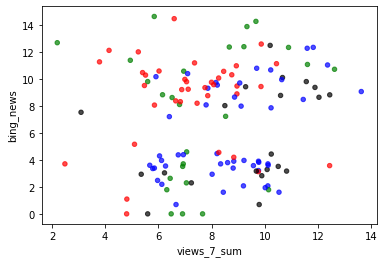

In [34]:
col = data[data.year==2020].cat.map({'politics':'b', 'sports':'r', 'disaster': 'black', 'culture': 'g'})
data[data.year==2020].plot.scatter(x='views_7_sum', y='bing_news', c=col, alpha=0.7)

In [108]:
data.economic_region.unique()

array(['Global North', 'Global South'], dtype=object)

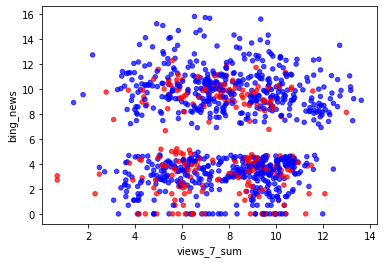

In [20]:
col = data.economic_region.map({'Global South':'r', 'Global North':'b'})
data.plot.scatter(x='views_7_sum', y='bing_news', c=col, alpha=0.7)